### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

- Importing Libraries 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

 - loading dataset

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
# scatter plot -> axes level function
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='sex',style='time',size='size')

In [ ]:
# scatter plot -> figure level function

sns.relplot(data=tips,x='total_bill',y='tip',kind='scatter',hue='sex',style='time',size='size')

In [ ]:
# Line plot
temp_df = tips[tips['sex'] == 'Male']
temp_df

In [ ]:
# axes level function

sns.lineplot(data=temp_df,x='tip',y='total_bill',hue='day',size='size')

In [ ]:
# figure level function

sns.relplot(kind="line",data=temp_df,x='tip',y='total_bill',hue='day',size='size')

In [ ]:
# facet plot -> figure level function -> work with relplot
# it will not work with scatterplot and lineplot
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', col='sex', row='smoker')

In [ ]:
# col wrap
sns.relplot(data=tips, x='sex', y='tip', kind='line', col='day', col_wrap=3)

In [ ]:
# it only works with relplot it will not work with scatter and line plot
sns.scatterplot(data=tips, x='total_bill', y='tip', col='sex', row='day')

### 2. Distribution Plots

- used for univariate analysis (Apply on one columns)
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

# Histplot 
- it is like histogram 

- figure level -> displot
- axes level -> histplot -> kdeplot -> rugplot

In [ ]:
# plotting univariate histogram
# axes level function
sns.histplot(data=tips,x='total_bill')

In [ ]:
# plotting univariate histogram
# figure level function
sns.displot(data=tips,x='total_bill',kind='hist')

In [ ]:
# bins parameter means it will distribute your graph into given bins
# it work with both axes and figure level function
sns.displot(data=tips,x='total_bill',kind='hist',bins = 10)

In [ ]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables
# it may say countplot 
# countplot

sns.displot(data=tips,x='sex',kind='hist')

In [ ]:
# hue parameter
#element means it will fill color and make chart more visualize
sns.displot(data=tips,x='total_bill',kind="hist",hue='sex',element='step')

In [ ]:
# faceting using col and row -> not work on histplot function
# it work only on figure level function which is displot

titanic = sns.load_dataset('titanic')
titanic.head()


In [ ]:
sns.displot(data=titanic, x='sex',hue='survived',element='step',col='who')

In [ ]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.kdeplot(data=tips,x='total_bill')

# hue
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True,height=10,aspect=2)

In [ ]:
# Rugplot

# Plot marginal distributions by drawing ticks along the x and y axes.

# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.
sns.kdeplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill')

In [ ]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color

# sns.histplot(data=tips, x='total_bill', y='tip')
sns.displot(data=tips, x='total_bill', y='tip',kind='hist')

In [ ]:
# Bivariate Kdeplot
# a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian
sns.kdeplot(data=tips, x='total_bill', y='tip')

In [ ]:
import plotly.express as px
gap = px.data.gapminder()
temp_df = gap[gap['country'] == 'India']
temp_df

### 2. Matrix Plot

- Heatmap
- Clustermap

In [ ]:
# 1 heatmap 
# Plot rectangular data as a color-encoded matrix
# where our data is too wide or long we uses pivot function to make it in desire format
temp_df = gap.pivot(index='country',columns='year',values='lifeExp')
temp_df

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(temp_df,)

In [ ]:
# annot
temp_df = gap[gap['continent'] == 'Europe'].pivot(index='country',columns='year',values='lifeExp')
plt.figure(figsize=(15,15))
sns.heatmap(data=temp_df,annot=True,linewidths=0.5,cmap='summer')

## Categorical Plots

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Pointplot
- Countplot

### Figure level function -> `catplot`

In [53]:
import seaborn as sns

In [54]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

<Axes: xlabel='day', ylabel='total_bill'>

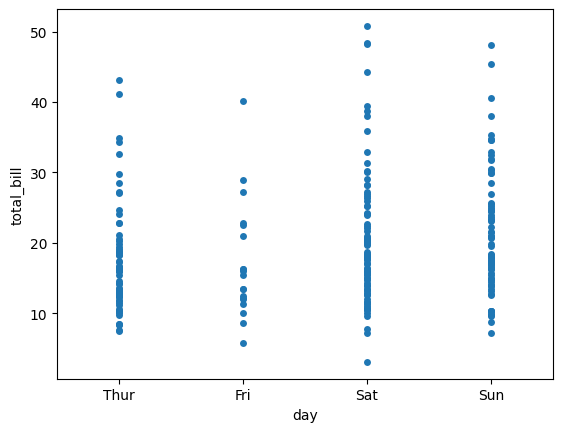

In [ ]:
# 1. stripplot -> it is scatterplot between numarical and categorial data 
# axes level function -> srtipplot
sns.stripplot(data=tips,x='day',y='total_bill',jitter=False)

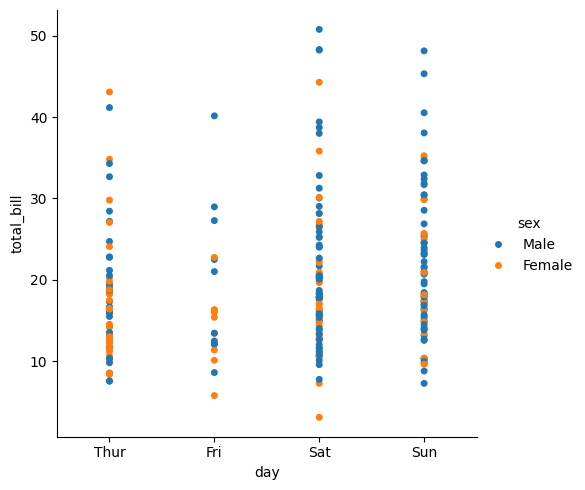

In [63]:
# figure level function -> catplot
sns.catplot(kind='strip',data=tips,x='day',y='total_bill',jitter=False,hue='sex')


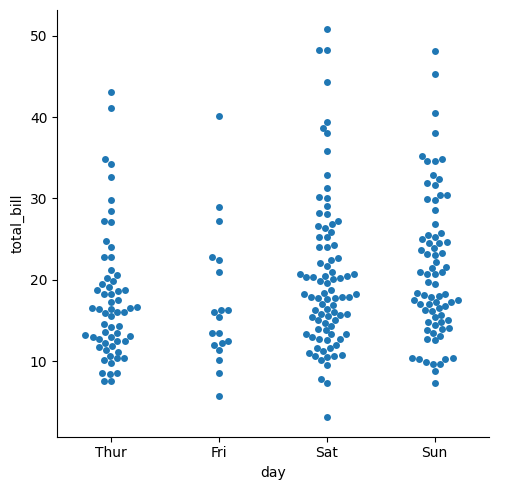

In [ ]:
# swarmplot
# it uses internal algorithm to distribute data 
# it uses for small data , not good for big data

sns.catplot(kind='swarm',data=tips,x='day',y='total_bill')

### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

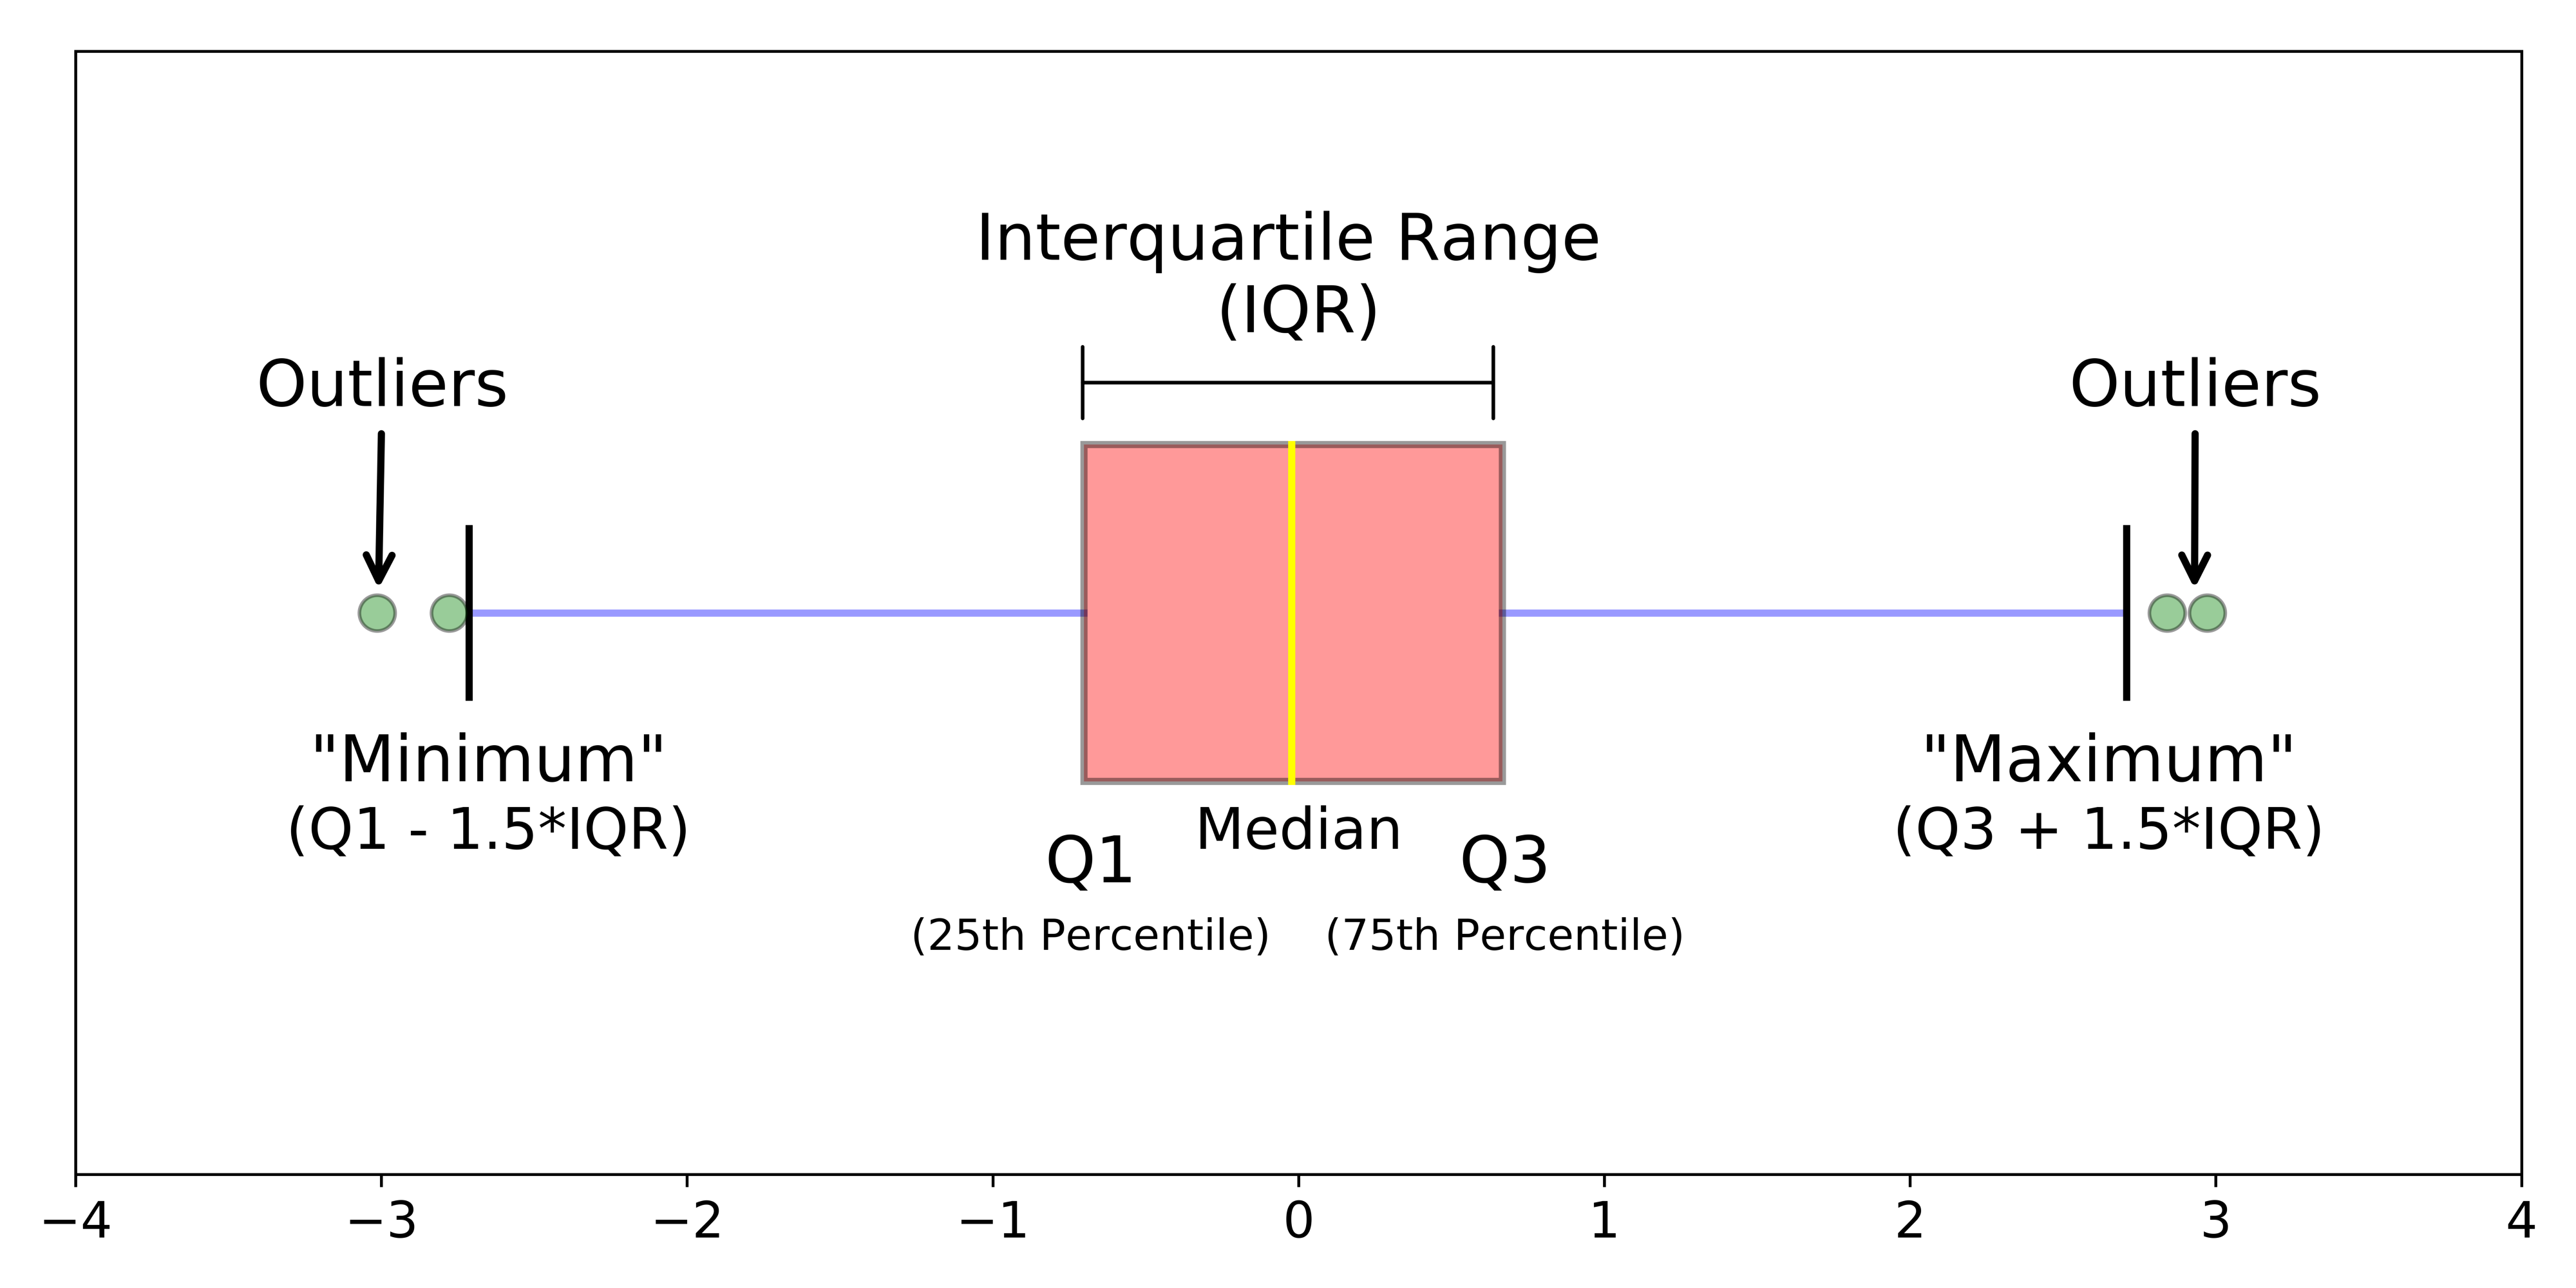

<Axes: xlabel='day', ylabel='total_bill'>

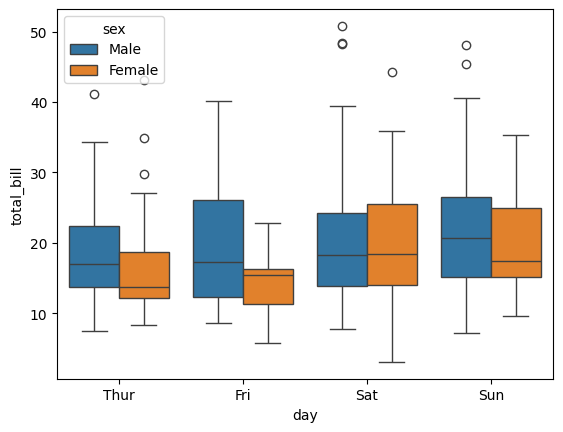

In [67]:
# axes level function -> boxplot

sns.boxplot(data=tips,x='day',y='total_bill',hue='sex')

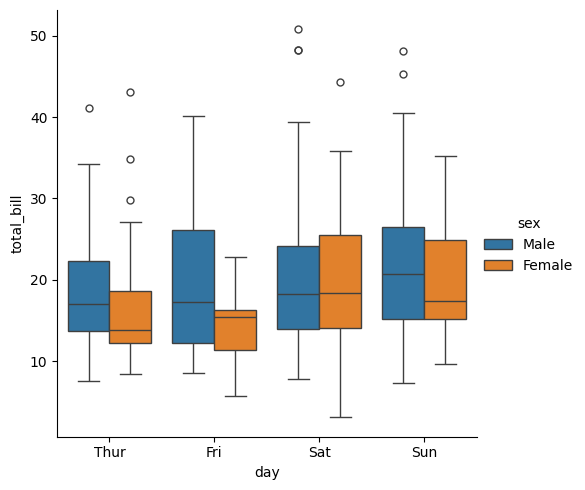

In [68]:
# figure level function -> catplot

sns.catplot(data=tips,x='day',y='total_bill',hue='sex',kind='box')

<Axes: ylabel='tip'>

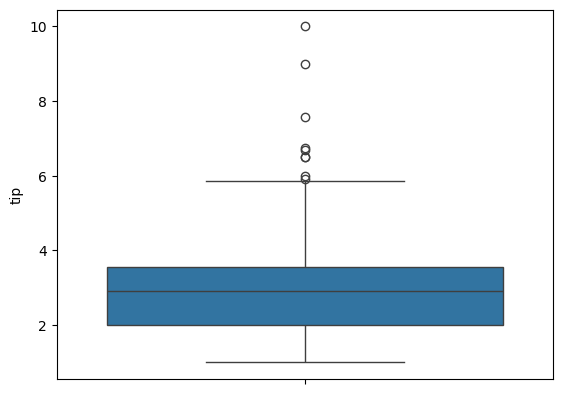

In [70]:
# single box plot -> numeric col
sns.boxplot(data=tips,y='tip')